In [2]:
%matplotlib inline

In [6]:
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

In [7]:
def initialize(context):
    context.stock = symbol('AAPL') # which stock to trade
    context.index_average_window = 100 # moving average window
    
def handle_data(context, data):
    # request history for the stock
    equities_hist = data.history(context.stock,
                                "close",
                                context.index_average_window,
                                "1d")
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
        
    # place order
    order_target_percent(context.stock, stock_weight)
    
def analyze(context, perf):
    fig = plt.figure(figsize = (12, 8))
    
    # first chart
    ax = fig.add_subplot(311)
    ax.set_title("Strategy Results")
    ax.semilogy(perf['portfolio_value'],
               linestyle='-',
               label='Equity Curve',
               linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    
    ax = fig.add_subplot(312)
    ax.semilogy(perf['gross_leverage'],
               linestyle='-',
               label='Exposure',
               linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    ax = fig.add_subplot(313)
    ax.semilogy(perf['returns'],
               linestyle='-',
               label='Returns',
               linewidth=1.0)
    ax.legend()
    ax.grid(True)

C:\Users\52218\anaconda3\envs\zipline\lib\site-packages\empyrical\stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Users\52218\anaconda3\envs\zipline\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\52218\anaconda3\envs\zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


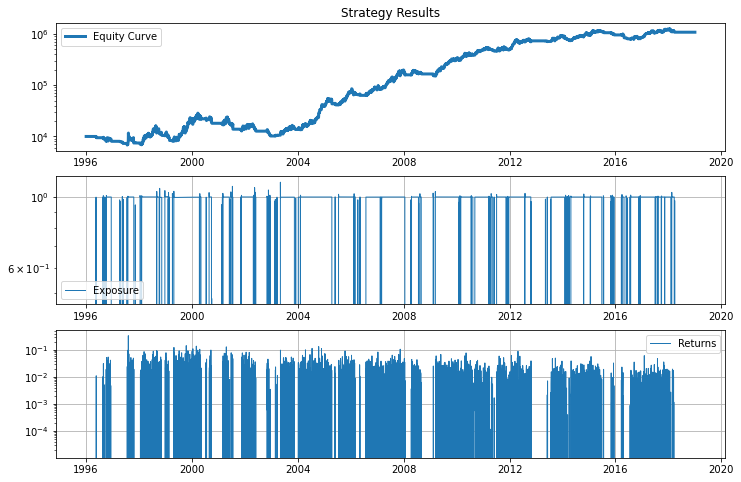

In [8]:
start_date = pd.Timestamp(datetime(1996, 1, 1, tzinfo=pytz.UTC))
end_date = pd.Timestamp(datetime(2018, 12, 31, tzinfo=pytz.UTC))
results =  run_algorithm(start = start_date,
                        end=end_date,
                        initialize=initialize,
                        analyze=analyze,
                        handle_data=handle_data,
                        capital_base=10000,
                        data_frequency='daily',
                        bundle='quandl')